## BITS F464 - Semester 1 - MACHINE LEARNING
### ASSIGNMENT 1 - LINEAR MODELS FOR REGRESSION AND CLASSIFICATION

### Team number: 24

### Full names of all students in the team:
Pavas Garg, Tushar Raghani, Rohan Pothireddy, Kolasani Amit Vishnu, Aditya Anant Shankar Singh

### Id number of all students in the team:
2021A7PS2587H, 2021A7PS1404H, 2021A7PS0365H, 2021A7PS0151H, 2021A3PS2722H

# `1. Dataset Generation`

In [1]:
%pip install sdv
%pip install urllib3==1.26.7


[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: pip3.9 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: pip3.9 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## `Importing the Libraries`

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random

## `⏳ Loading the Dataset`

In [3]:
real_data = pd.read_csv('diabetes2 - Diabetes.csv')
real_data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
print("Number of records in the given dataset are: ",len(real_data))
print("Number of features in the given dataset are: ",len(real_data.columns)-1)

Number of records in the given dataset are:  768
Number of features in the given dataset are:  8


## `Creating Metadata` 

In [5]:
from sdv.metadata import SingleTableMetadata
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=real_data)

## `Creating Synthesizer`

In [6]:
from sdv.lite import SingleTablePreset

synthesizer = SingleTablePreset(
    metadata,
    name='FAST_ML'
)

In [7]:
# We can train the synthesizer. We pass in the real data so it can learn patterns using machine learning.
synthesizer.fit(data = real_data)

In [8]:
# creating a dataset containing 500 rows
synthetic_data = synthesizer.sample(
    num_rows = 500
)
synthetic_data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin        BMI  \
0            7      149             96             19       10  38.387409   
1            0      151             44              6      105  26.125923   
2            3      169             57             24      240  33.224573   
3            4       86             61             35        0  32.918264   
4            6       75             62             31       77  37.453830   

   DiabetesPedigreeFunction  Age  Outcome  
0                  0.561331   40        1  
1                  0.463959   27        1  
2                  0.541364   36        0  
3                  0.526311   39        0  
4                  0.178734   21        0

## `Comparing Original Data with Synthetic Data`

In [9]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    real_data,
    synthetic_data,
    metadata
)

Generating report ...
(2/2) Evaluating Column Pair Trends: : 100%|███| 36/36 [00:00<00:00, 333.88it/s]

Overall Quality Score: 92.34%

Properties:
- Column Shapes: 87.12%
- Column Pair Trends: 97.56%


## `KSComplement`

In [10]:
# The KSComplement uses the Kolmogorov-Smirnov statistic.
# To compute this statistic, we convert a numerical distribution into its cumulative distribution function (CDF).
# The KS statistic is the maximum difference between the two CDFs, as shown below.

In [11]:
quality_report.get_visualization('Column Shapes')

In [12]:
from sdv.evaluation.single_table import get_column_plot

fig = get_column_plot(
    real_data=real_data,
    synthetic_data=synthetic_data,
    column_name='BMI',
    metadata=metadata
)

fig.show()

In [13]:
fig = get_column_plot(
    real_data=real_data,
    synthetic_data=synthetic_data,
    column_name='Outcome',
    metadata=metadata
)

fig.show()

In [14]:
from sdv.evaluation.single_table import get_column_pair_plot
fig = get_column_pair_plot(
    real_data=real_data,
    synthetic_data=synthetic_data,
    column_names=['BMI', 'Insulin'],
    metadata=metadata
)

fig.show()

# `2.🔬Preprocess and perform exploratory data analysis of the dataset obtained`

In [15]:
# take a look at the data
synthetic_data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin        BMI  \
0            7      149             96             19       10  38.387409   
1            0      151             44              6      105  26.125923   
2            3      169             57             24      240  33.224573   
3            4       86             61             35        0  32.918264   
4            6       75             62             31       77  37.453830   

   DiabetesPedigreeFunction  Age  Outcome  
0                  0.561331   40        1  
1                  0.463959   27        1  
2                  0.541364   36        0  
3                  0.526311   39        0  
4                  0.178734   21        0

In [16]:
# understanding the data parameters
synthetic_data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   500.000000  500.000000     500.000000     500.000000  500.000000   
mean      4.006000  120.454000      71.080000      21.778000   97.290000   
std       3.052967   33.702754      18.964517      13.916467   92.202932   
min       0.000000   14.000000      22.000000       0.000000    0.000000   
25%       2.000000   98.000000      58.000000      11.000000    1.000000   
50%       4.000000  120.500000      71.000000      22.000000   78.000000   
75%       6.000000  145.000000      85.000000      32.000000  165.000000   
max      17.000000  199.000000     122.000000      55.000000  378.000000   

              BMI  DiabetesPedigreeFunction       Age     Outcome  
count  500.000000                500.000000  500.0000  500.000000  
mean    32.518053                  0.511352   34.4500    0.330000  
std      7.887027                  0.299594   10.0826    0.470684  
min     10.903340                  0.078000   21.0000    0.000000  
25%     27.161187                  0.255483   27.0000    0.000000  
50%     32.593184                  0.508918   33.0000    0.000000  
75%     37.500736                  0.735819   41.0000    1.000000  
max     59.937412                  1.413874   73.0000    1.000000

In [17]:
# checking outcome variable, i.e how many are diabetic
print(synthetic_data.Outcome.value_counts())

0    335
1    165
Name: Outcome, dtype: int64


# `📊 Plotting Histograms`

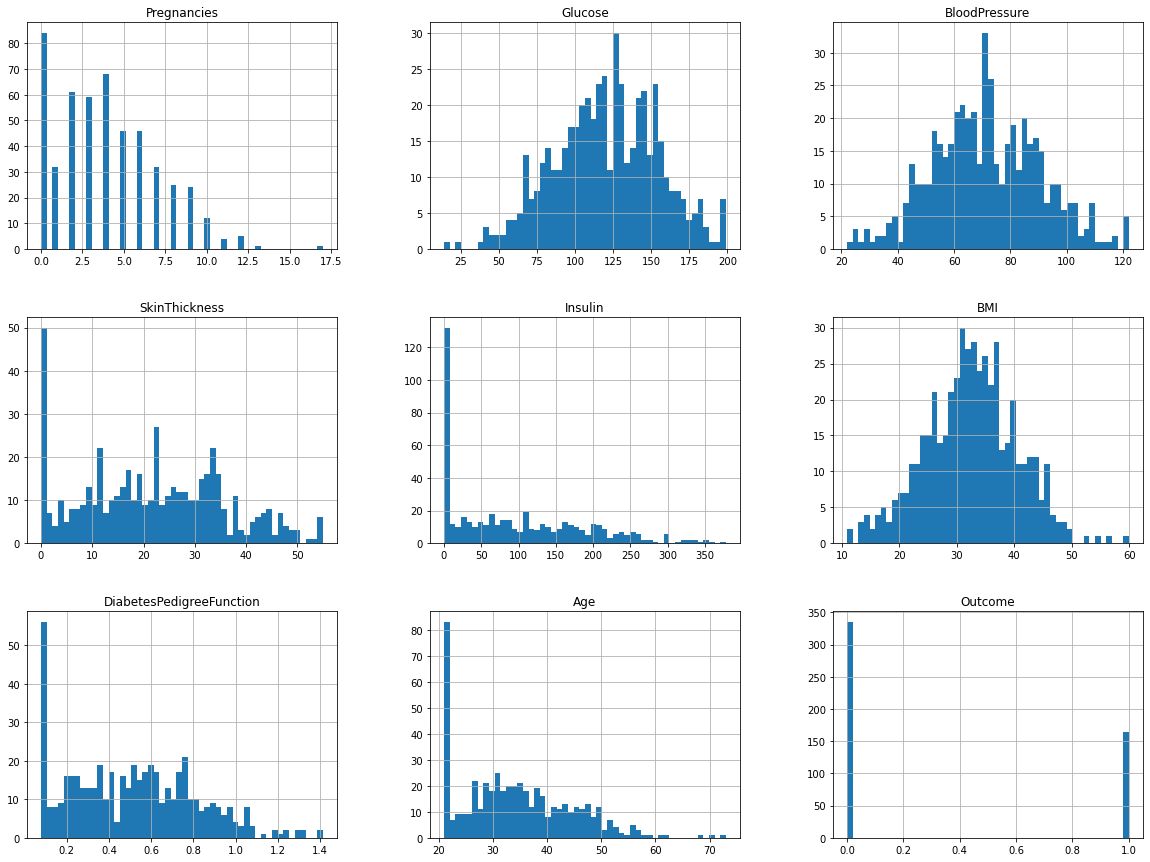

In [18]:
synthetic_data.hist(bins = 50,figsize=(20,15))
plt.show()

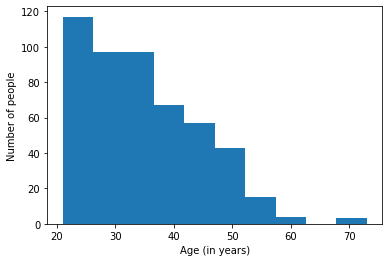

In [19]:
# plotting histogram to see distribution of age among the people
plt.hist(np.array(synthetic_data.Age))
plt.xlabel("Age (in years)")
plt.ylabel("Number of people")
plt.show()

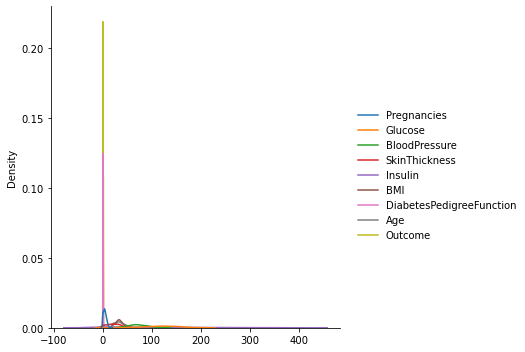

In [20]:
sns.displot(synthetic_data, kind='kde',aspect=1,height=5)
plt.show()

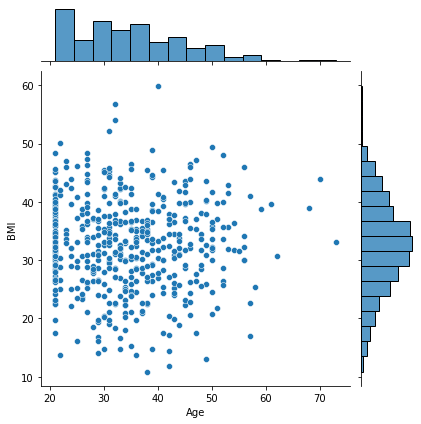

In [21]:
sns.jointplot(data=synthetic_data, x="Age", y="BMI",kind="scatter")
plt.show()

In [22]:
# Assigning X as dataframe of features and Y as output variable
X = synthetic_data.drop(columns='Outcome')
Y = synthetic_data.Outcome

In [23]:
X.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin        BMI  \
0            7      149             96             19       10  38.387409   
1            0      151             44              6      105  26.125923   
2            3      169             57             24      240  33.224573   
3            4       86             61             35        0  32.918264   
4            6       75             62             31       77  37.453830   

   DiabetesPedigreeFunction  Age  
0                  0.561331   40  
1                  0.463959   27  
2                  0.541364   36  
3                  0.526311   39  
4                  0.178734   21

In [24]:
# To check if data is missing or not?
X.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

# `Outlier Detection - IQR`

### What is an Outlier?
  - A data point which is significantly far from other data points
  - Inter-Quartile Range Method to remove Outliers (IQR)
  - IQR = Q3 - Q1
  - Upper_Limit = Q3 + 1.5*IQR
  - Lower_Limit = Q1 - 1.5*IQR 

In [25]:
def plot_boxplot(dataframe,feature):
    red_circle = dict(markerfacecolor='red', marker='o')
    mean_shape = dict(markerfacecolor='green',marker='D',markeredgecolor='green')
    dataframe.boxplot(column=[feature],flierprops = red_circle,showmeans=True,meanprops=mean_shape,notch=True)
    plt.grid(False)
    plt.show()

## `Plotting Individual Box Plots`

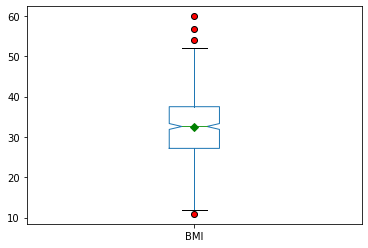

In [26]:
# red circles are the outliers 
plot_boxplot(synthetic_data,"BMI")

## `Plotting Box Plot for multiple features (before outlier removal) `

In [27]:
def plot_boxplot_multiple_features():
    red_circle = dict(markerfacecolor='red', marker='o')
    mean_shape = dict(markerfacecolor='green',marker='D',markeredgecolor='green')
    fig,axis = plt.subplots(1,len(synthetic_data.columns),figsize=(20,10))
    for i,ax in enumerate(axis.flat):
        ax.boxplot(synthetic_data.iloc[:,i],flierprops=red_circle,showmeans=True,meanprops=mean_shape,notch=True)
        ax.set_title(synthetic_data.columns[i],fontsize=20,fontweight=20)
        ax.tick_params(axis='y',labelsize=14)

    plt.tight_layout()

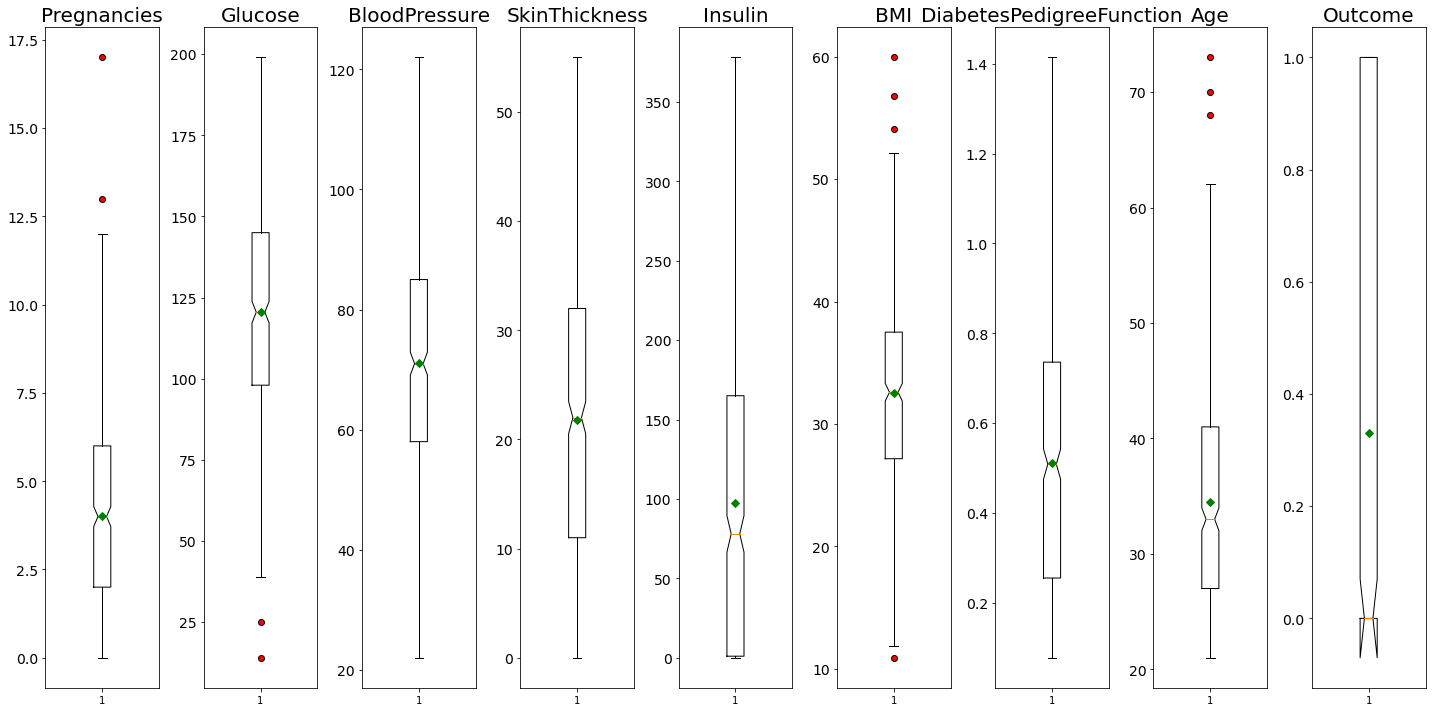

In [28]:
plot_boxplot_multiple_features()

In [29]:
# function to return list of indices which are outliers for that feature
def find_outlier_IQR(dataframe,feature):
    q1 = dataframe[feature].quantile(0.25)
    q3 = dataframe[feature].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5*iqr
    upper_limit = q3 + 1.5*iqr
    outlier_indices = dataframe.index[(dataframe[feature] < lower_limit) | (dataframe[feature] > upper_limit)]
    return outlier_indices

In [30]:
# creating a list to store indices of outliers, for all features
outlier_index_list = []
for feature in synthetic_data.columns:
    outlier_index_list.extend(find_outlier_IQR(synthetic_data,feature))

In [31]:
# checking the outlier list
print(outlier_index_list)

[51, 121, 22, 153, 48, 233, 234, 238, 51, 310, 441]


In [32]:
# function to remove outliers and which will return a clean datafram without the outliers
def remove_outliers(dataframe,outlier_index_list):
    outlier_index_list = sorted(set(outlier_index_list)) # use a set to remove duplicate values of indices
    dataframe = dataframe.drop(outlier_index_list)
    return dataframe

In [33]:
synthetic_data = remove_outliers(synthetic_data,outlier_index_list)

In [34]:
# checking the len after outlier removal
print(len(synthetic_data))

490


## `Plotting Box Plot for multiple features (after outlier removal) `

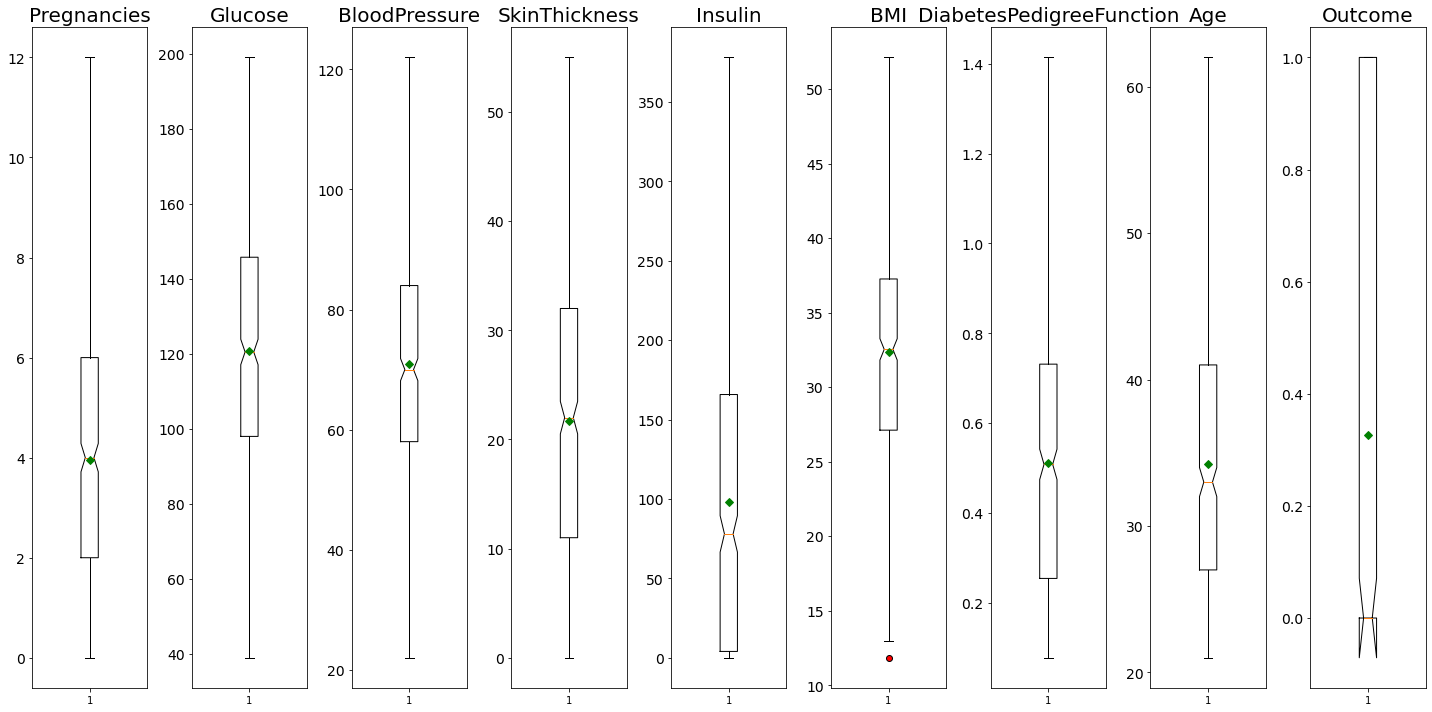

In [35]:
plot_boxplot_multiple_features() # we can observe the difference now

# `Correlation Matrix`

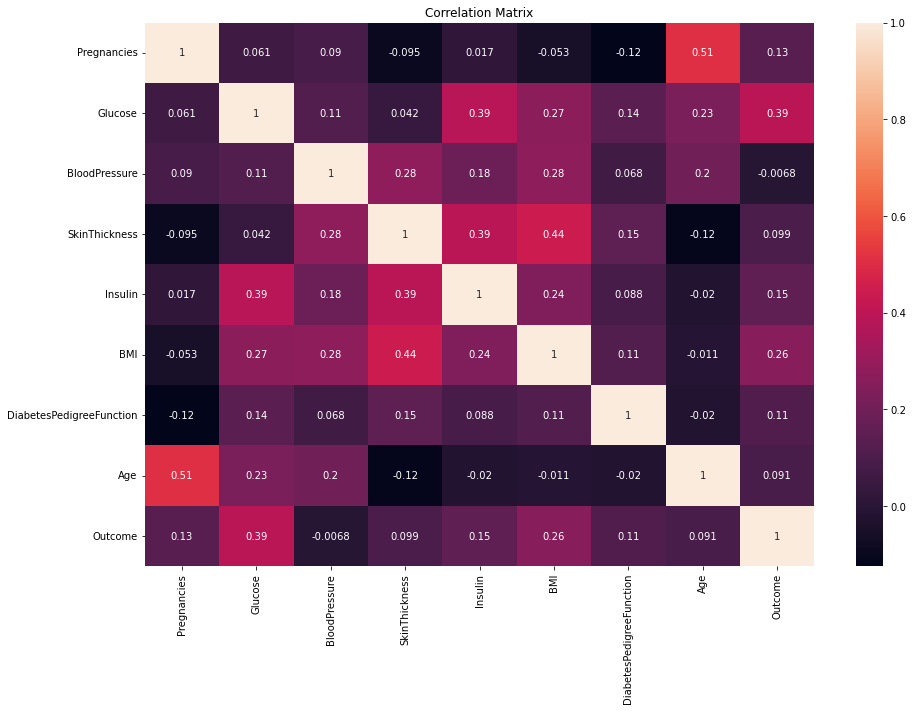

In [36]:
correlation = synthetic_data.corr()
plt.subplots(figsize=(15,10))
heatmap = sns.heatmap(correlation,annot=True)
heatmap.set(title='Correlation Matrix')
plt.show()

## `Plotting Correlation Graphs for Strongly Related Features`

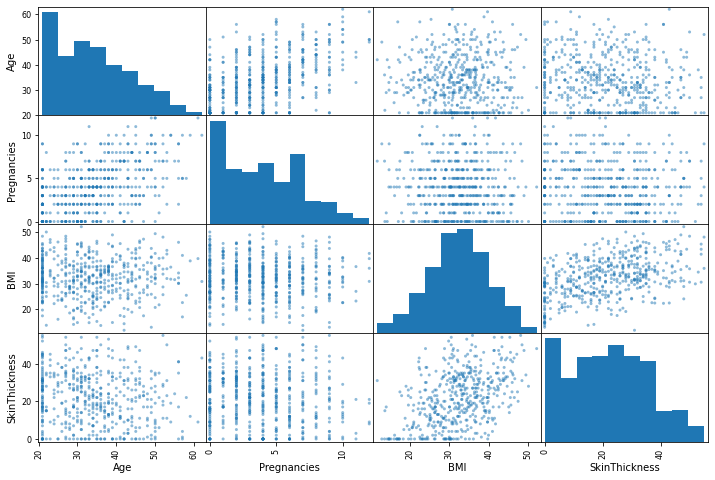

In [37]:
from pandas.plotting import scatter_matrix
attributes = ["Age","Pregnancies","BMI","SkinThickness"]
scatter_matrix(synthetic_data[attributes],figsize=(12,8))
plt.show()

# `Feature Scaling`

### Standardization Method
- Standardization is performed to transform the data to have a mean of 0 and standard deviation of 1
- Standardization is also known as Z-Score Normalization

\begin{equation}
z = \frac{(x-\mu)}{\sigma}
\end{equation}

In [38]:
# function for finding mean of a feature in a given dataset
def find_mean(dataset,feature):
    n = len(dataset[feature])
    sum = 0
    for val in dataset[feature]:
        sum += val
    return sum/n

In [39]:
# function for finding standard deviation of a feature in a given dataset
def find_standard_deviation(dataset,feature):
    variance, squared_sum = 0,0
    n = len(dataset[feature])
    mean = find_mean(dataset,feature)
    for val in dataset[feature]:
        squared_sum += (val-mean)**2
    variance = squared_sum/n
    return math.sqrt(variance)

In [40]:
# function for scaling a feature in given dataset
def standardize_feature(dataset,feature):
    mean = find_mean(dataset,feature)
    standard_deviation = find_standard_deviation(dataset,feature)
    standardized_feature = []
    for val in dataset[feature]:
        standardized_feature.append((val-mean)/standard_deviation)
    return standardized_feature

In [41]:
# function for scaling (standardizing) the whole dataset
def standardize_dataset(dataset):
    df = dataset.drop(columns = 'Outcome')
    standardized_df = pd.DataFrame()
    for feature in df.columns:
        standardized_result = standardize_feature(df,feature)
        standardized_df[feature] = standardized_result
        
# When copying columns from one DataFrame to another, you might get NaN values in the resulting DataFrame.
# The issue is caused because the indexes of the DataFrames are different.
# This causes the indexes for each column to be different.
# When pandas tries to align the indexes when assigning columns to the second DataFrame, it fails and inserts NaN values.
# One way to resolve the issue is to homogenize the index values.
# for eg [a,b,c,d] for df1 and indices for df2 are [1,2,3,4]
# that's why use df1.index = df2.index

    standardized_df.index = dataset.index 
    standardized_df['Outcome'] = dataset['Outcome']
    return standardized_df

## `Plot showing distribution of features before standardization`

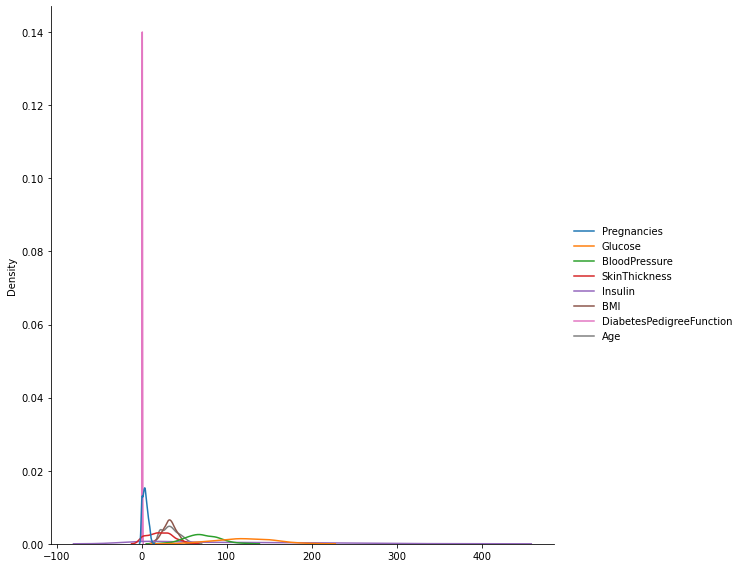

In [42]:
# all features following a normal distribution with mean 0 and standard deviation of 1
sns.displot(synthetic_data.drop(columns='Outcome'), kind='kde',aspect=1,height=8)
plt.show()

## `Standardizing the dataset`

In [43]:
# standardizing the complete dataset
synthetic_data = standardize_dataset(synthetic_data)
synthetic_data.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     1.036835  0.853573       1.329260      -0.195985 -0.954224  0.787420   
1    -1.340400  0.914014      -1.424361      -1.131833  0.073331 -0.819270   
2    -0.321585  1.457982      -0.735956       0.163957  1.533540  0.110905   
3     0.018020 -1.050314      -0.524139       0.955829 -1.062388  0.070767   
4     0.697230 -1.382739      -0.471185       0.667875 -0.229528  0.665088   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.169148  0.595125        1  
1                 -0.154962 -0.741127        1  
2                  0.102685  0.183971        0  
3                  0.052580  0.492337        0  
4                 -1.104359 -1.357859        0

In [44]:
# checking mean and variance of each feature after standardizing the dataset
df = synthetic_data.drop(columns = 'Outcome')
for feature in df:
    print("Mean of",feature,"is",round(find_mean(synthetic_data,feature)))
    print("Standard Deviation of",feature,"is",round(find_standard_deviation(synthetic_data,feature)))

Mean of Pregnancies is 0
Standard Deviation of Pregnancies is 1
Mean of Glucose is 0
Standard Deviation of Glucose is 1
Mean of BloodPressure is 0
Standard Deviation of BloodPressure is 1
Mean of SkinThickness is 0
Standard Deviation of SkinThickness is 1
Mean of Insulin is 0
Standard Deviation of Insulin is 1
Mean of BMI is 0
Standard Deviation of BMI is 1
Mean of DiabetesPedigreeFunction is 0
Standard Deviation of DiabetesPedigreeFunction is 1
Mean of Age is 0
Standard Deviation of Age is 1


## `Plot showing distribution of features after standardization`

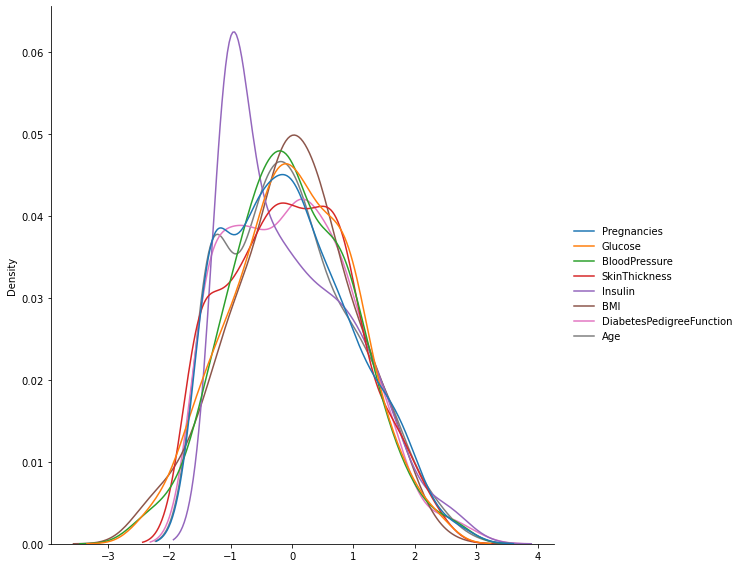

In [45]:
# all features following a normal distribution with mean 0 and standard deviation of 1
sns.displot(synthetic_data.drop(columns='Outcome'), kind='kde',aspect=1,height=8)
plt.show()

## `Train-Test Split`

In [46]:
def split_train_test(data,test_ratio):
    # np.random.seed() is very important as whenever we call the function it will randomly divide the indices
    # it might happen after many calls our model sees all the data and it leads to overfitting so to prevent it
    # seed function will randomly divide data only once and once the function is called it will not give other
    # permuatation of indices whenever called again,hence no overfitting
    np.random.seed(45)
    # it will give random permutation of indices from 0 to len(data)-1
    # now shuffled array will contain random number for eg [0,4,1,99,12,3...]
    shuffled = np.random.permutation(len(data))  
    test_set_size = int(len(data)*test_ratio)
    # it will give array of indices from index 0 to test_set_size-1
    test_indices = shuffled[:test_set_size]
    # it will give array of indices from index test_set_size till last
    train_indices = shuffled[test_set_size:]
    # it will return rows from data df corresponding to indices given in train and test indices array
    # so it is returning the train and test data respectively
    return data.iloc[train_indices], data.iloc[test_indices]

In [47]:
train_set, test_set = split_train_test(synthetic_data,0.2)

In [48]:
train_set.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
23      1.376440  1.488202       1.594031       0.235945 -0.856877 -0.088203   
269    -1.340400 -0.566787      -0.471185       0.667875 -0.272793  2.100413   
395     0.018020  0.188724      -0.841864      -1.563763 -1.062388 -2.047200   
304    -0.661190 -1.715164      -2.059812      -0.627915  0.040881 -1.115345   
270     1.716045 -0.113481       1.064488       0.019980 -0.716264  0.949135   

     DiabetesPedigreeFunction       Age  Outcome  
23                   1.897036  1.623011        0  
269                  0.445277 -1.357859        1  
395                 -0.292925 -0.535550        1  
304                  0.214513 -0.124395        0  
270                  0.819672  1.109068        0

In [49]:
len(train_set)

392

In [50]:
test_set.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
195     1.716045  1.971730       0.746763      -0.052008  1.219865 -0.255496   
287    -1.340400  0.400267       0.746763      -0.339961 -1.062388  1.661477   
111     1.376440  0.279385       0.587900      -0.699903  0.213943  0.563794   
258     0.357625 -0.566787       0.111312       0.739864 -0.629733 -0.201989   
380     0.018020 -2.168471      -1.424361      -0.843880 -1.062388 -0.112976   

     DiabetesPedigreeFunction       Age  Outcome  
195                  0.738375  0.903491        1  
287                  0.098441 -1.357859        0  
111                 -0.109522  0.286759        0  
258                  0.797461 -0.124395        0  
380                  0.065492 -1.357859        0

In [51]:
len(test_set)

98

# `Functions to evaluate different models`

In [52]:
# converting the predicted values to 0s and 1s
def convert_predicted_values(y_predicted):
    minimum_value = np.min(y_predicted)
    maximum_value = np.max(y_predicted)
    mid_value = (minimum_value+maximum_value)/2
    for index in range(len(y_predicted)):
        if(y_predicted[index] < mid_value):
            y_predicted[index] = 0
        else:
            y_predicted[index] = 1
    return  

In [53]:
def compare_predicted_original_values(y_predicted,y_original):
    correct, incorrect = 0,0
    for ind in range(len(y_predicted)):
        if y_predicted[ind] == y_original[ind]:
            correct += 1
        else:
            incorrect += 1
    return correct/len(y_predicted)

In [54]:
def calculate_metrics(true_labels, predicted_labels):
    # Initialize variables to store metrics
    precision = []
    recall = []
    f1_score = []

    unique_labels = np.unique(true_labels)

    for label in unique_labels:
        true_positive = np.sum((true_labels == label) & (predicted_labels == label))
        false_positive = np.sum((true_labels != label) & (predicted_labels == label))
        false_negative = np.sum((true_labels == label) & (predicted_labels != label))
        true_negative = np.sum((true_labels != label) & (predicted_labels != label))

        # Calculate metrics
        precision.append(true_positive / (true_positive + false_positive))
        recall.append(true_positive / (true_positive + false_negative))
        f1_score.append(2 * (precision[-1] * recall[-1]) / (precision[-1] + recall[-1]))

    return {
        'precision': precision,
        'recall': recall,
        'f1_score': f1_score,
    }

def classification_report(true_labels, predicted_labels):
    metrics = calculate_metrics(true_labels, predicted_labels)
    unique_labels = np.unique(true_labels)

    # Print the header
    header = ['Class', 'Precision', 'Recall', 'F1-Score']
    print('{:<10} {:<15} {:<15} {:<15}'.format(*header))

    # Print metrics for each class
    for i, label in enumerate(unique_labels):
        row = [f'Class {label}', metrics['precision'][i], metrics['recall'][i], metrics['f1_score'][i]]
        print('{:<10} {:<15.2f} {:<15.2f} {:<15}'.format(*row))

In [55]:
def calculate_confusion_matrix(true_labels, predicted_labels):
    unique_labels = np.unique(true_labels)
    num_classes = len(unique_labels)
    confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)

    for true_label, predicted_label in zip(true_labels, predicted_labels):
        true_label = int(true_label)
        predicted_label = int(predicted_label)
        confusion_matrix[true_label][predicted_label] += 1

    return confusion_matrix

def plot_confusion_matrix(confusion_matrix, class_names):
    num_classes = 2
    plt.figure(figsize=(8, 6))
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title('Confusion Matrix')
    plt.colorbar()

    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)

    for i in range(num_classes):
        for j in range(num_classes):
            plt.text(j, i, str(confusion_matrix[i][j]), ha='center', va='center', color='white' if confusion_matrix[i][j] > (confusion_matrix.max() / 2) else 'black')

    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [56]:
# defining a function to evaluate my models based on certain metrics(all proposed ones except roc_auc which has been done separately)
def print_score(model,y_train_predicted, y_train_actual, y_test_predicted, y_test_actual,train=True):
    print(f"Model : {model}")
    if model != "Logistic Regression":
        convert_predicted_values(y_train_predicted)
        convert_predicted_values(y_test_predicted)
    if train == True:
        print("Train Result:\n================================================\n")
        print(f"CLASSIFICATION REPORT:")
        classification_report(y_train_actual, y_train_predicted)
        print("_______________________________________________")
        print()
        print(f"Accuracy Score: {compare_predicted_original_values(y_train_predicted,y_train_actual) * 100:.2f}%")
        print("_______________________________________________")
        print()
        conf_matrix = calculate_confusion_matrix(y_train_actual, y_train_predicted)
        print(f"Confusion Matrix:")
        print(conf_matrix)
        print()
        plot_confusion_matrix(conf_matrix, class_names = ['Class 0', 'Class 1'])
    else:
        print("Test Result:\n================================================\n")
        print(f"CLASSIFICATION REPORT:")
        classification_report(y_test_actual, y_test_predicted)
        print("_______________________________________________")
        print()
        print(f"Accuracy Score: {compare_predicted_original_values(y_test_predicted,y_test_actual) * 100:.2f}%")
        print("_______________________________________________")
        print()
        conf_matrix = calculate_confusion_matrix(y_test_actual, y_test_predicted)
        print(f"Confusion Matrix:")
        print(conf_matrix)
        print()
        plot_confusion_matrix(conf_matrix, class_names = ['Class 0', 'Class 1'])

# `3. Comparison of Stochastic Gradient Descent and Batch Gradient Descent using Linear Regression`

## `Gradient Descent Algorithm`

- We will use this equation to update our linear regression model parameters

$$
\begin{equation}
\theta_{j} = \theta_{j} - {\alpha}\frac{\partial J(\theta)}{\partial \theta_{j}}  ,\quad\text {$0 \leq j \leq d$} 
\end{equation}
$$

$$
\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_{j}} = \sum_{i=1}^n(h_{\theta}(x) - y^{(i)})*x_{j}^{(i)}, \quad h_{\theta}(x) = \theta_{0} + \theta_{1}x_{1}  + \theta_{2}x_{2}  +  ... +  \theta_{d}x_{d}
\end{equation}
$$

- Repeat until convergence
$$
\begin{equation}
\theta_{j} = \theta_{j} - {\alpha}\sum_{i=1}^n(h_{\theta}(x) - y^{(i)})*x_{j}^{(i)} ,\quad\text {$0 \leq j \leq d$}
\end{equation}
$$

- Such that it minimizes the cost function given by equation

$$
\begin{equation}
J(\theta) = {\frac{1}{2}}\sum_{i=1}^n{(h_{\theta}(x)^{(i)} - y^{(i)})^2}
\end{equation}
$$

# `Stochastic Gradient Descent Algorithm`

In [57]:
# converting x_train and y_train to numpy arrays
x_train_stochastic = train_set.drop(columns='Outcome')
y_train_stochastic = train_set['Outcome'].to_numpy()
x_test = test_set.drop(columns='Outcome')
y_test = test_set['Outcome'].to_numpy()

constants = []
for i in range(len(x_train_stochastic)):
    constants.append(1)
const_test = []
for i in range(len(x_test)):
    const_test.append(1)
    
x_test["Constants"] = const_test  # adding columns of 1's for bias variable
x_test = x_test.to_numpy()

x_train_stochastic["Constants"] = constants # adding columns of 1's for bias variable
x_train_stochastic = x_train_stochastic.to_numpy()

In [58]:
print(x_train_stochastic[:5])

[[ 1.37643985  1.4882025   1.59403076  0.23594542 -0.85687682 -0.08820307
   1.89703599  1.6230115   1.        ]
 [-1.34040014 -0.56678744 -0.47118469  0.6678754  -0.27279313  2.10041291
   0.44527704 -1.35785879  1.        ]
 [ 0.01801986  0.18872357 -0.84186438 -1.56376283 -1.06238774 -2.04719959
  -0.29292469 -0.53554974  1.        ]
 [-0.66119014 -1.71516417 -2.05981196 -0.62791454  0.04088144 -1.11534531
   0.21451304 -0.12439522  1.        ]
 [ 1.71604485 -0.11348084  1.06448834  0.01998043 -0.71626408  0.9491354
   0.81967154  1.10906835  1.        ]]


In [59]:
print(y_train_stochastic[:5])

[0 1 1 0 0]


In [60]:
# initializing the weight vector
theta_vector_stochastic = np.random.randn(len(x_train_stochastic[0]))
print(theta_vector_stochastic)

[-0.96239193 -0.57677834  0.9280277  -0.57798304  0.465992   -2.3340407
 -1.81580835 -0.48979854  1.08234728]


In [61]:
# defining arrays to store cost value for each iteration
iteration_x_axis_stochastic = []
cost_y_axis_stochastic = []

In [62]:
# function to find cost value, using the formula for J(theta)
def find_cost(y_actual,y_predicted):
    cost = 0
    for i in range(len(y_actual)):
        cost += (y_predicted[i] - y_actual[i])**2
    return (1/2)*cost

In [63]:
# defining the variables
learning_rate = 0.0001
max_iterations = 100000
tolerance = 1e-6

In [64]:
def find_predicted_value_stochastic(x_vector,theta_vector):
    return np.dot(x_vector,theta_vector)

In [65]:
def stochastic_gradient_descent():
    prev_cost = 0
    for iteration in range(0,150):
        # will give the predicted value, after each iteration using updated weights
        y_predicted = np.dot(x_train_stochastic,theta_vector_stochastic) 
        
        current_cost = find_cost(y_train_stochastic,y_predicted)
        if(abs(prev_cost-current_cost) < tolerance): break
            
        # this loop will update all the parameters one by one
        for theta_j in range(len(theta_vector_stochastic)):
            
            # this will iterate over each training data point and update the theta_j after each iteration
            for index in range(len(x_train_stochastic)):
                xj = x_train_stochastic[index,theta_j]
                y_predicted_itr = find_predicted_value_stochastic(x_train_stochastic[index],theta_vector_stochastic)
                difference_actual_predicted = (y_predicted_itr-y_train_stochastic[index])
                gradient = difference_actual_predicted*xj
                
                # update theta_j after each and every data point
                theta_vector_stochastic[theta_j] = theta_vector_stochastic[theta_j] - learning_rate *gradient
                
                y_predicted = np.dot(x_train_stochastic,theta_vector_stochastic)
                current_cost = find_cost(y_train_stochastic,y_predicted)
                iteration_x_axis_stochastic.append(iteration)
                cost_y_axis_stochastic.append(current_cost)

                
    prev_cost = current_cost
    # adding cost to cost array after each iteration
    iteration_x_axis_stochastic.append(iteration)
    cost_y_axis_stochastic.append(current_cost)

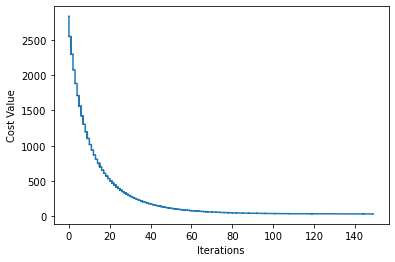

In [66]:
stochastic_gradient_descent()
# plot showing how the cost function decreases and then becomes constant after certain number of iterations
plt.plot(iteration_x_axis_stochastic,cost_y_axis_stochastic)
plt.xlabel("Iterations")
plt.ylabel("Cost Value")
plt.show()

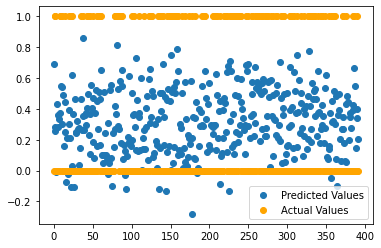

In [67]:
# to see the predicted values for training data set
y_train_predicted = np.dot(x_train_stochastic,theta_vector_stochastic)
plt.scatter([index for index in range(0,len(train_set))],y_train_predicted)
plt.scatter([index for index in range(0,len(train_set))],y_train_stochastic,color='orange')
plt.legend(['Predicted Values','Actual Values'])
plt.show()

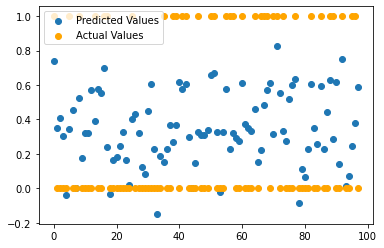

In [68]:
# to see the predicted values for test data set
y_test_predicted = np.dot(x_test,theta_vector_stochastic)
plt.scatter([index for index in range(0,len(test_set))],y_test_predicted)
plt.scatter([index for index in range(0,len(test_set))],y_test,color='orange')
plt.legend(['Predicted Values','Actual Values'])
plt.show()

## `Training Data Analysis`

Model : Stochastic Gradient Descent
Train Result:

CLASSIFICATION REPORT:
Class      Precision       Recall          F1-Score       
Class 0    0.86            0.57            0.6862302483069977
Class 1    0.47            0.80            0.592375366568915
_______________________________________________

Accuracy Score: 64.54%
_______________________________________________

Confusion Matrix:
[[152 114]
 [ 25 101]]



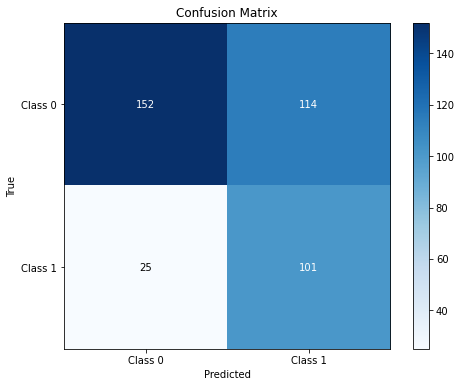

In [69]:
print_score('Stochastic Gradient Descent',y_train_predicted,y_train_stochastic,y_test_predicted,y_test,True)

## `Test Data Analysis`

Model : Stochastic Gradient Descent
Test Result:

CLASSIFICATION REPORT:
Class      Precision       Recall          F1-Score       
Class 0    0.80            0.67            0.728813559322034
Class 1    0.52            0.68            0.5897435897435898
_______________________________________________

Accuracy Score: 67.35%
_______________________________________________

Confusion Matrix:
[[43 21]
 [11 23]]



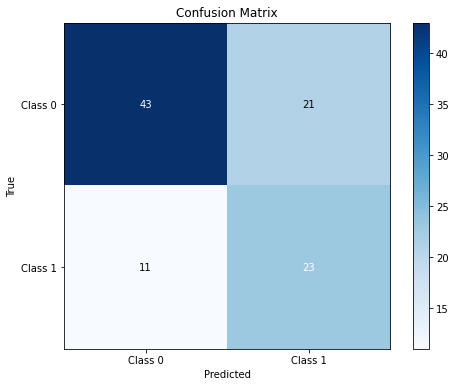

In [70]:
print_score('Stochastic Gradient Descent',y_train_predicted,y_train_stochastic,y_test_predicted,y_test,False)

# `Batch Gradient Descent Algorithm`

In [71]:
# converting x_train and y_train to numpy arrays
x_train_batch = train_set.drop(columns='Outcome')
y_train_batch = train_set['Outcome'].to_numpy()
constants = []
for i in range(len(x_train_batch)):
    constants.append(1)
x_train_batch["Constants"] = constants # adding columns of 1's for bias variable
x_train_batch = x_train_batch.to_numpy()

In [72]:
# initializing the weight vector
theta_vector_batch = np.random.randn(len(x_train_batch[0]))
print(theta_vector_batch)

[-0.27595601  1.13934051  0.67818456  1.10393579  2.35839423  0.84062875
 -0.33649718  0.18368531  0.40636103]


In [73]:
# defining arrays to store cost value for each iteration
iteration_x_axis_batch = []
cost_y_axis_batch = []

In [74]:
def batch_gradient_descent():
    prev_cost = 0
    
    for iteration in range(max_iterations):
        # will give the predicted value, after each iteration using updated weights
        
        y_predicted = np.dot(x_train_batch,theta_vector_batch) 
        current_cost = find_cost(y_train_batch,y_predicted)
        if(abs(prev_cost-current_cost) < tolerance): break
            
        # this loop will update all the parameters one by one
        for theta_j in range(len(theta_vector_batch)):
            
            # defining the xj vector for the column corresponding the weight theta_j
            xj_vector = x_train_batch[:,theta_j]
            
            # defining the vector representing the difference between predicted and actual values
            difference_actual_predicted_vector = (y_predicted-y_train_batch).reshape(len(x_train_batch),-1)
            
            gradient =  np.dot(xj_vector,difference_actual_predicted_vector)
            theta_vector_batch[theta_j] = theta_vector_batch[theta_j] - learning_rate *gradient
            
        prev_cost = current_cost
        
        # adding cost to cost array after each iteration
        iteration_x_axis_batch.append(iteration)
        cost_y_axis_batch.append(current_cost)

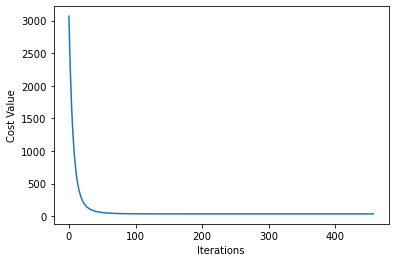

In [75]:
batch_gradient_descent()
# plot showing how the cost function decreases and then becomes constant after certain number of iterations
plt.plot(iteration_x_axis_batch,cost_y_axis_batch)
plt.xlabel("Iterations")
plt.ylabel("Cost Value")
plt.show()

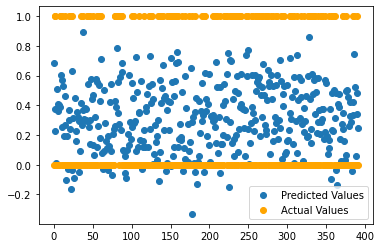

In [76]:
# to see the predicted values for training data set
y_train_predicted = np.dot(x_train_batch,theta_vector_batch)
plt.scatter([index for index in range(0,len(train_set))],y_train_predicted)
plt.scatter([index for index in range(0,len(train_set))],y_train_batch,color='orange')
plt.legend(['Predicted Values','Actual Values'])
plt.show()

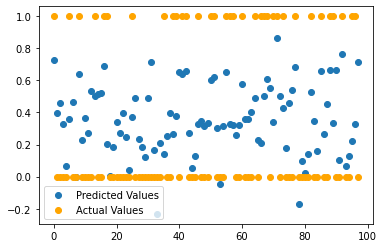

In [77]:
# to see the predicted values for test data set
y_test_predicted = np.dot(x_test,theta_vector_batch)
plt.scatter([index for index in range(0,len(test_set))],y_test_predicted)
plt.scatter([index for index in range(0,len(test_set))],y_test,color='orange')
plt.legend(['Predicted Values','Actual Values'])
plt.show()

## `Training Data Analysis`

Model : Batch Gradient Descent
Train Result:

CLASSIFICATION REPORT:
Class      Precision       Recall          F1-Score       
Class 0    0.88            0.56            0.6850574712643679
Class 1    0.48            0.84            0.6074498567335244
_______________________________________________

Accuracy Score: 65.05%
_______________________________________________

Confusion Matrix:
[[149 117]
 [ 20 106]]



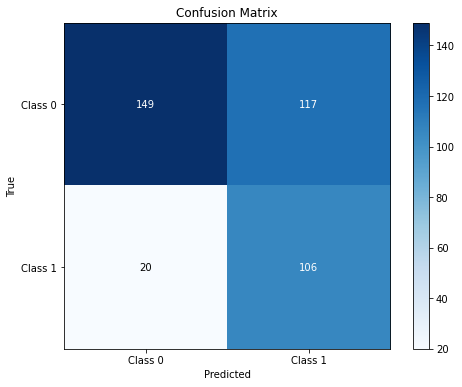

In [78]:
print_score('Batch Gradient Descent',y_train_predicted,y_train_batch,y_test_predicted,y_test,True)

## `Test Data Analysis`

Model : Batch Gradient Descent
Test Result:

CLASSIFICATION REPORT:
Class      Precision       Recall          F1-Score       
Class 0    0.87            0.53            0.6601941747572816
Class 1    0.49            0.85            0.6236559139784946
_______________________________________________

Accuracy Score: 64.29%
_______________________________________________

Confusion Matrix:
[[34 30]
 [ 5 29]]



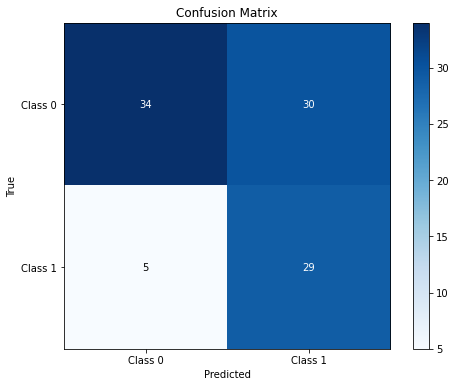

In [79]:
print_score('Batch Gradient Descent',y_train_predicted,y_train_batch,y_test_predicted,y_test,False)

# `Insights Drawn (plots, markdown explanations)`

## `Comparing Cost of Batch and Stochastic Gradient Descent`

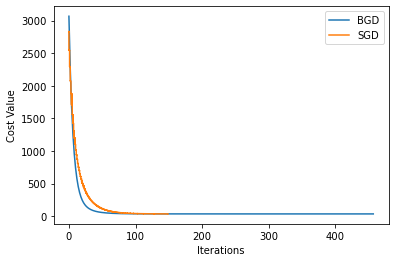

In [80]:
plt.plot(iteration_x_axis_batch,cost_y_axis_batch)
plt.plot(iteration_x_axis_stochastic,cost_y_axis_stochastic)
plt.legend(['BGD','SGD'])
plt.xlabel("Iterations")
plt.ylabel("Cost Value")
plt.show()

- In ```batch gradient descent```, we are updating the model's parameters after we iterate through the entire dataset. Hence, it provides a ```more stable convergence``` towards the ```local minima``` of the cost function.


- In ```stochastic gradient descent```, we are updating the model's parameters after ```each observation```. Hence, it has a higher variance which results in a less stable convergence path.


- In stochastic gradient descent, it takes lesser number of iterations to converge to the local minima, as compared to batch gradient descent. For instance, the graphs plotted above show that stochastic gradient descent takes approximately ```100 iterations```, whereas batch gradient descent takes around ```400 iterations``` to converge to the local minima.


- The graph of the cost function shows ```more fluctuations in stochastic gradient descent```, whereas batch gradient descent has a ```smoother curve```.


- In reference to the model's ability to predict unseen data, the difference in batch and stochastic gradient descent can be ```negligible``` while using appropriate learning rates.  

#  `Comparison of Lasso and Ridge Regression using Polynomial Regression`

# `Lasso Regression`

- We will use this equation to update our ridge regression model parameters

$$
\begin{equation}
\theta_{j} = \theta_{j} - {\alpha}\frac{\partial J(\theta)}{\partial \theta_{j}}  ,\quad\text {$0 \leq j \leq d$} 
\end{equation}
$$

$$
\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_{j}} = \sum_{i=1}^n(h_{\theta}(x) - y^{(i)})*x_{j}^{(i)} + {\lambda}*{\theta_{j}}, \quad h_{\theta}(x) = \theta_{0} + \theta_{1}x_{1}  + \theta_{2}x_{2}  +  ... +  \theta_{d}x_{d}
\end{equation}
$$

- Repeat until convergence
$$
\begin{equation}
\theta_{j} = \theta_{j} - {\alpha}*{({\sum_{i=1}^n(h_{\theta}(x) - y^{(i)})*x_{j}^{(i)}+ {\lambda}*{\theta_{j}}})} ,\quad\text {$0 \leq j \leq d$}
\end{equation}
$$

- Such that it minimizes the cost function given by equation

$$
\begin{equation}
 J(w) = \frac{1}{2} \sum_{n=1}^{N} \left( y(x_n, w) - y^{(i)} \right)^2 + \frac{\lambda}{2} \| \mathbf{w} \|_1
\end{equation}
$$

- Where,
$$
\| \mathbf{w} \|_1 \equiv \mathbf{w}^T \mathbf{w} = w_0 + w_1 + \ldots + w_D \quad\text {,for  d  features } 
$$

In [81]:
# making x_train and y_train vectors for the dataset
x_train = train_set.drop(columns='Outcome')
y_train = train_set['Outcome'].to_numpy()
constants = []
for i in range(len(x_train)):
    constants.append(1)
x_train["Constants"] = constants # adding columns of 1's for bias variable
x_train = x_train.to_numpy()

In [82]:
x_train[:5]

array([[ 1.37643985,  1.4882025 ,  1.59403076,  0.23594542, -0.85687682,
        -0.08820307,  1.89703599,  1.6230115 ,  1.        ],
       [-1.34040014, -0.56678744, -0.47118469,  0.6678754 , -0.27279313,
         2.10041291,  0.44527704, -1.35785879,  1.        ],
       [ 0.01801986,  0.18872357, -0.84186438, -1.56376283, -1.06238774,
        -2.04719959, -0.29292469, -0.53554974,  1.        ],
       [-0.66119014, -1.71516417, -2.05981196, -0.62791454,  0.04088144,
        -1.11534531,  0.21451304, -0.12439522,  1.        ],
       [ 1.71604485, -0.11348084,  1.06448834,  0.01998043, -0.71626408,
         0.9491354 ,  0.81967154,  1.10906835,  1.        ]])

In [83]:
y_train[:5]

array([0, 1, 1, 0, 0])

In [84]:
# initializing the weight vector
theta_vector = np.random.randn(len(x_train[0]))
print(theta_vector)

[ 0.21948888  0.93908147  0.25892877  0.82004396 -0.19519462  0.70182419
 -0.55645826  0.08903963 -0.11035091]


In [85]:
# defining arrays to store cost value for each iteration
iteration_x_axis = []
cost_y_axis = []

In [86]:
# function to find cost value, using the formula
def find_cost_lasso_regression(y_actual,y_predicted,theta_vector,Lambda):
    cost = 0
    for i in range(len(y_actual)):
        cost += (y_predicted[i] - y_actual[i])**2
    cost = 0.5*cost
    # adding the ridge regression penalty term to the cost
    cost += (Lambda*0.5)*np.asarray(theta_vector)
    return cost[0] # returns the cost value instead of cost array

In [87]:
def lasso_regression_gradient_descent(theta_vector,x_train,Lambda,learning_rate,iteration_x_axis,cost_y_axis):
    prev_cost = 0
    
    for iteration in range(max_iterations):
        # will give the predicted value, after each iteration using updated weights
        
        y_predicted = np.dot(x_train,theta_vector) 
        
        # to see if cost becomes constant after a point
        current_cost = find_cost_lasso_regression(y_train,y_predicted,theta_vector,Lambda)
        if(abs(prev_cost-current_cost) < tolerance): break
            
        # this loop will update all the parameters one by one
        for theta_j in range(len(theta_vector)):
            
            # defining the xj vector for the column corresponding the weight theta_j
            xj_vector = x_train[:,theta_j]
            
            # defining the vector representing the difference between predicted and actual values
            difference_actual_predicted_vector = (y_predicted-y_train).reshape(len(x_train),-1)
            
            gradient =  np.dot(xj_vector,difference_actual_predicted_vector)
            gradient_ridge_regression = gradient + Lambda # adding gradient due to L1 penalty
            
            # for the bias term, don't penalize it
            if(theta_j == len(theta_vector)-1):
                theta_vector[theta_j] = theta_vector[theta_j] - learning_rate*gradient
            else:
                theta_vector[theta_j] = theta_vector[theta_j] - learning_rate*gradient_ridge_regression
                    
        prev_cost = current_cost
        
        # adding cost to cost array after each iteration
        iteration_x_axis.append(iteration)
        cost_y_axis.append(current_cost)
    
    return theta_vector

In [88]:
def mse_sse_lasso(x_train,theta_vector,x_test):
    # finding error for the train data
    print("Train Result:\n================================================\n")
    y_train_predicted = np.dot(x_train,theta_vector)
    y_train_actual = train_set['Outcome'].to_numpy()
    sse = find_cost_lasso_regression(y_train_actual,y_train_predicted,theta_vector,2)
    print("SSE for this lasso regression model is: ",sse)
    mse = sse/len(y_test)
    print("MSE for this lasso regression model is: ",mse)

    print()
    print()

    # finding error for the test data
    print("Test Result:\n================================================\n")
    y_test_predicted = np.dot(x_test,theta_vector)
    y_test_actual = test_set['Outcome'].to_numpy()
    sse = find_cost_lasso_regression(y_test_actual,y_test_predicted,theta_vector,2)
    print("SSE for this lasso regression model is: ",sse)
    mse = sse/len(y_test)
    print("MSE for this lasso regression model is: ",mse)

## `Test Run for Linear Polynomial with degree 1`

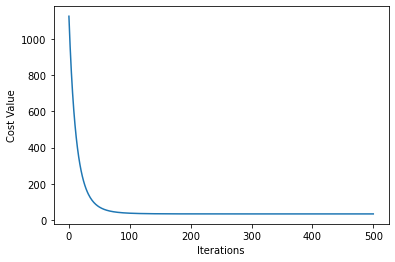

Train Result:

SSE for this lasso regression model is:  33.67160272108089
MSE for this lasso regression model is:  0.3435877828681723


Test Result:

SSE for this lasso regression model is:  9.032796850256403
MSE for this lasso regression model is:  0.09217139643118778


In [89]:
# for lambda = 2 and alpha = 0.001
theta_vector = np.random.randn(len(x_train[0]))
iteration_x_axis = []
cost_y_axis = []
theta_vector = lasso_regression_gradient_descent(theta_vector,x_train,2,0.0001,iteration_x_axis,cost_y_axis)
# plot showing how the cost function decreases and then becomes constant after certain number of iterations
plt.plot(iteration_x_axis,cost_y_axis)
plt.xlabel("Iterations")
plt.ylabel("Cost Value")
plt.show()

# finding error for the test data
mse_sse_lasso(x_train,theta_vector,x_test)

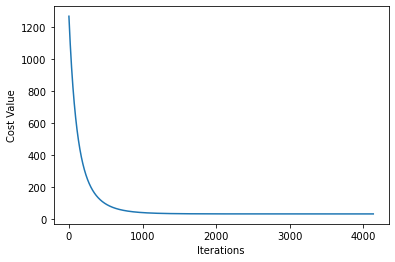

Train Result:

SSE for this lasso regression model is:  33.65756502755897
MSE for this lasso regression model is:  0.34344454109754047


Test Result:

SSE for this lasso regression model is:  9.052815713612407
MSE for this lasso regression model is:  0.09237567054706539


In [90]:
# for lambda = 1 and alpha = 0.00001
theta_vector = np.random.randn(len(x_train[0]))
iteration_x_axis = []
cost_y_axis = []
theta_vector = lasso_regression_gradient_descent(theta_vector,x_train,1,0.00001,iteration_x_axis,cost_y_axis)
# plot showing how the cost function decreases and then becomes constant after certain number of iterations
plt.plot(iteration_x_axis,cost_y_axis)
plt.xlabel("Iterations")
plt.ylabel("Cost Value")
plt.show()

# finding error for the test data
mse_sse_lasso(x_train,theta_vector,x_test)

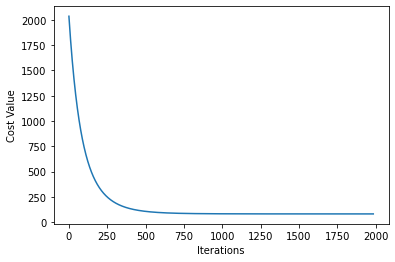

Train Result:

SSE for this lasso regression model is:  88.77240308145281
MSE for this lasso regression model is:  0.9058408477699266


Test Result:

SSE for this lasso regression model is:  21.09269391455562
MSE for this lasso regression model is:  0.21523157055669


In [91]:
# for lambda = 100 and alpha = 0.00001
theta_vector = np.random.randn(len(x_train[0]))
iteration_x_axis = []
cost_y_axis = []
theta_vector = lasso_regression_gradient_descent(theta_vector,x_train,100,0.00001,iteration_x_axis,cost_y_axis)
# plot showing how the cost function decreases and then becomes constant after certain number of iterations
plt.plot(iteration_x_axis,cost_y_axis)
plt.xlabel("Iterations")
plt.ylabel("Cost Value")
plt.show()

# finding error for the test data
mse_sse_lasso(x_train,theta_vector,x_test)

## `Function for generating non linear polynomials`

In [92]:
# function for generating higher degree polynomial
def give_higher_degree_polynomial(degree,row_vector,theta_vector):
    output_vector =  row_vector[np.newaxis].T # output vector will become a column vector with dimensions d*1
    # this will loop as many times as the degree
    for i in range(1,degree):
        # multiplying two matrices with dimensions, d^(i)*1 and 1*d, to get d^(i)*d matrix
        output_vector =  output_vector @ row_vector 
        # making output_vector as a column vector with dimensions d^(i+1)*1, where i is the ith degree
        output_vector = output_vector.flatten()[np.newaxis].T
    return output_vector

In [93]:
def generate_data_theta_vector_higher_degree(degree,x_train):
    x_data = [] # defining the new variables
    
    # it will initialize the theta_vector will random values for all weights, if degree is d, we will have 9^d weights
    theta_vector = np.random.randn(len(x_train[0])**degree)
    
    # it will iterate over each row in dataset
    for observation in range(len(x_train)):
        row_vector = give_higher_degree_polynomial(degree,x_train[0][np.newaxis],theta_vector.T).T
        x_data.append(row_vector[0])

    x_data = np.array(x_data)
    return x_data, theta_vector

## `Test Run for Polynomial with degree 2`

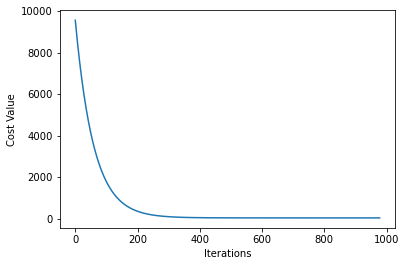

Train Result:

SSE for this lasso regression model is:  42.8324051182319
MSE for this lasso regression model is:  0.43706535834930504


Test Result:

SSE for this lasso regression model is:  4428.863227597992
MSE for this lasso regression model is:  45.19248191426522


In [94]:
# for lambda = 2 and alpha = 0.0000001
iteration_x_axis = []
cost_y_axis = []
x_data_train, theta_vector = generate_data_theta_vector_higher_degree(2,x_train)
x_data_test, theta_vector = generate_data_theta_vector_higher_degree(2,x_test)
theta_vector = lasso_regression_gradient_descent(theta_vector,x_data_train,2,0.0000001,iteration_x_axis,cost_y_axis)
# plot showing how the cost function decreases and then becomes constant after certain number of iterations
plt.plot(iteration_x_axis,cost_y_axis)
plt.xlabel("Iterations")
plt.ylabel("Cost Value")
plt.show()

# finding error for the data
mse_sse_lasso(x_data_train,theta_vector,x_data_test)

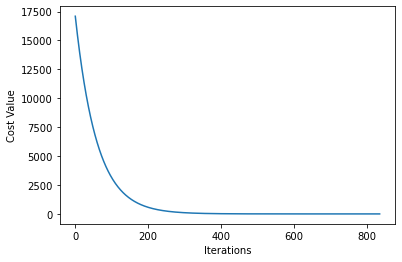

Train Result:

SSE for this lasso regression model is:  42.97136622124925
MSE for this lasso regression model is:  0.43848332878825763


Test Result:

SSE for this lasso regression model is:  11.632815019893673
MSE for this lasso regression model is:  0.11870219408054769


In [95]:
# for lambda = 10 and alpha = 0.0000001
iteration_x_axis = []
cost_y_axis = []
x_data_train, theta_vector = generate_data_theta_vector_higher_degree(2,x_train)
x_data_test, theta_vector = generate_data_theta_vector_higher_degree(2,x_test)
theta_vector = lasso_regression_gradient_descent(theta_vector,x_data_train,10,0.0000001,iteration_x_axis,cost_y_axis)
# plot showing how the cost function decreases and then becomes constant after certain number of iterations
plt.plot(iteration_x_axis,cost_y_axis)
plt.xlabel("Iterations")
plt.ylabel("Cost Value")
plt.show()

# finding error for the data
mse_sse_lasso(x_data_train,theta_vector,x_data_test)

## `Test Run for Polynomial with degree 3`

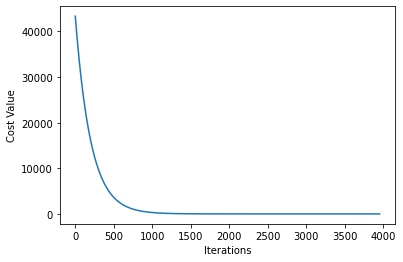

Train Result:

SSE for this lasso regression model is:  43.91738535673027
MSE for this lasso regression model is:  0.44813658527275785


Test Result:

SSE for this lasso regression model is:  53812.027192530615
MSE for this lasso regression model is:  549.1023182911288


In [96]:
# for lambda = 1 and alpha = 0.000000002
iteration_x_axis = []
cost_y_axis = []
x_data_train, theta_vector = generate_data_theta_vector_higher_degree(3,x_train)
x_data_test, theta_vector = generate_data_theta_vector_higher_degree(3,x_test)
theta_vector = lasso_regression_gradient_descent(theta_vector,x_data_train,1,0.000000002,iteration_x_axis,cost_y_axis)
# plot showing how the cost function decreases and then becomes constant after certain number of iterations
plt.plot(iteration_x_axis,cost_y_axis)
plt.xlabel("Iterations")
plt.ylabel("Cost Value")
plt.show()

# finding error for the data
mse_sse_lasso(x_data_train,theta_vector,x_data_test)

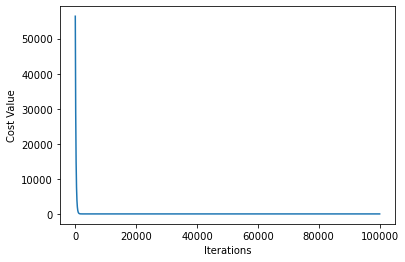

Train Result:

SSE for this lasso regression model is:  39.79122998584207
MSE for this lasso regression model is:  0.40603295903920483


Test Result:

SSE for this lasso regression model is:  81492.78289389722
MSE for this lasso regression model is:  831.5590091214002


In [97]:
# for lambda = 50 and alpha = 0.000000002
iteration_x_axis = []
cost_y_axis = []
x_data_train, theta_vector = generate_data_theta_vector_higher_degree(3,x_train)
x_data_test, theta_vector = generate_data_theta_vector_higher_degree(3,x_test)
theta_vector = lasso_regression_gradient_descent(theta_vector,x_data_train,50,0.000000002,iteration_x_axis,cost_y_axis)
# plot showing how the cost function decreases and then becomes constant after certain number of iterations
plt.plot(iteration_x_axis,cost_y_axis)
plt.xlabel("Iterations")
plt.ylabel("Cost Value")
plt.show()


# finding error for the data
mse_sse_lasso(x_data_train,theta_vector,x_data_test)

## `Test Run for Polynomial with degree 4`

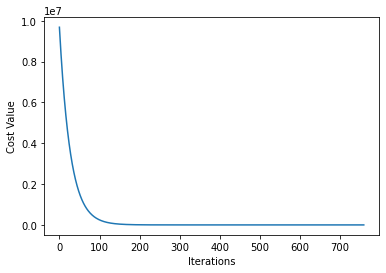

Train Result:

SSE for this lasso regression model is:  43.1987952880265
MSE for this lasso regression model is:  0.44080403355129083


Test Result:

SSE for this lasso regression model is:  1551353.994358283
MSE for this lasso regression model is:  15830.142799574316


In [98]:
# for lambda = 2 and alpha = 0.000000001
iteration_x_axis = []
cost_y_axis = []
x_data_train, theta_vector = generate_data_theta_vector_higher_degree(4,x_train)
x_data_test, theta_vector = generate_data_theta_vector_higher_degree(4,x_test)
theta_vector = lasso_regression_gradient_descent(theta_vector,x_data_train,2,0.000000001,iteration_x_axis,cost_y_axis)
# plot showing how the cost function decreases and then becomes constant after certain number of iterations
plt.plot(iteration_x_axis,cost_y_axis)
plt.xlabel("Iterations")
plt.ylabel("Cost Value")
plt.show()

# finding error for the data
mse_sse_lasso(x_data_train,theta_vector,x_data_test)

# `Ridge Regression`

- We will use this equation to update our ridge regression model parameters

$$
\begin{equation}
\theta_{j} = \theta_{j} - {\alpha}\frac{\partial J(\theta)}{\partial \theta_{j}}  ,\quad\text {$0 \leq j \leq d$} 
\end{equation}
$$

$$
\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_{j}} = \sum_{i=1}^n(h_{\theta}(x) - y^{(i)})*x_{j}^{(i)} + {\lambda}*{\theta_{j}}, \quad h_{\theta}(x) = \theta_{0} + \theta_{1}x_{1}  + \theta_{2}x_{2}  +  ... +  \theta_{d}x_{d}
\end{equation}
$$

- Repeat until convergence
$$
\begin{equation}
\theta_{j} = \theta_{j} - {\alpha}*{({\sum_{i=1}^n(h_{\theta}(x) - y^{(i)})*x_{j}^{(i)}+ {\lambda}*{\theta_{j}}})} ,\quad\text {$0 \leq j \leq d$}
\end{equation}
$$

- Such that it minimizes the cost function given by equation

$$
\begin{equation}
 J(w) = \frac{1}{2} \sum_{n=1}^{N} \left( y(x_n, w) - y^{(i)} \right)^2 + \frac{\lambda}{2} \| \mathbf{w} \|_2^2
\end{equation}
$$

- Where,
$$
\| \mathbf{w} \|_2^2 \equiv \mathbf{w}^T \mathbf{w} = w_0^2 + w_1^2 + \ldots + w_D^2 \quad\text {,for  d  features } 
$$

In [99]:
# making x_train and y_train vectors for the dataset
x_train = train_set.drop(columns='Outcome')
y_train = train_set['Outcome'].to_numpy()
x_test = test_set.drop(columns='Outcome')
y_test = test_set['Outcome'].to_numpy()
constants = []
for i in range(len(x_train)):
    constants.append(1)
const_test = []
for i in range(len(x_test)):
    const_test.append(1)
x_train["Constants"] = constants # adding columns of 1's for bias variable
x_test["Constants"] = const_test  # adding columns of 1's for bias variable
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()

In [100]:
x_train[:5]

array([[ 1.37643985,  1.4882025 ,  1.59403076,  0.23594542, -0.85687682,
        -0.08820307,  1.89703599,  1.6230115 ,  1.        ],
       [-1.34040014, -0.56678744, -0.47118469,  0.6678754 , -0.27279313,
         2.10041291,  0.44527704, -1.35785879,  1.        ],
       [ 0.01801986,  0.18872357, -0.84186438, -1.56376283, -1.06238774,
        -2.04719959, -0.29292469, -0.53554974,  1.        ],
       [-0.66119014, -1.71516417, -2.05981196, -0.62791454,  0.04088144,
        -1.11534531,  0.21451304, -0.12439522,  1.        ],
       [ 1.71604485, -0.11348084,  1.06448834,  0.01998043, -0.71626408,
         0.9491354 ,  0.81967154,  1.10906835,  1.        ]])

In [101]:
y_train[:5]

array([0, 1, 1, 0, 0])

In [102]:
# initializing the weight vector
theta_vector = np.random.randn(len(x_train[0]))
print(theta_vector)

[ 0.10794906  0.33406917 -0.68745273 -0.89985933 -0.85308643  0.28447424
  1.41694959 -0.53697736  0.06928685]


In [103]:
# defining the variables
learning_rate = 0.00001
max_iterations = 10000
tolerance = 1e-6
Lambda = 4

In [104]:
# function to find cost value, using the formula
def find_cost_ridge_regression(y_actual,y_predicted,theta_vector,Lambda):
    cost = 0
    for i in range(len(y_actual)):
        cost += (y_predicted[i] - y_actual[i])**2
    cost = 0.5*cost
    # adding the ridge regression penalty term to the cost
    cost += (Lambda*0.5)*np.asarray([w**2 for w in theta_vector])
    return cost[0] # returns the cost value instead of cost array

In [105]:
# defining arrays to store cost value for each iteration
iteration_x_axis = []
cost_y_axis = []

In [106]:
def ridge_regression_gradient_descent(theta_vector,x_train,Lambda,learning_rate,iteration_x_axis,cost_y_axis):
    prev_cost = 0
    
    for iteration in range(max_iterations):
        # will give the predicted value, after each iteration using updated weights
        
        y_predicted = np.dot(x_train,theta_vector) 
        
        # to see if cost becomes constant after a point
        current_cost = find_cost_ridge_regression(y_train,y_predicted,theta_vector,Lambda)
        if(abs(prev_cost-current_cost) < tolerance): break
            
        # this loop will update all the parameters one by one
        for theta_j in range(len(theta_vector)):
            
            # defining the xj vector for the column corresponding the weight theta_j
            xj_vector = x_train[:,theta_j]
            
            # defining the vector representing the difference between predicted and actual values
            difference_actual_predicted_vector = (y_predicted-y_train).reshape(len(x_train),-1)
            
            gradient =  np.dot(xj_vector,difference_actual_predicted_vector)
            gradient_ridge_regression = gradient + Lambda*theta_vector[theta_j] # adding gradient due to L2 penalty
            
            # for the bias term, don't penalize it
            if(theta_j == len(theta_vector)-1):
                theta_vector[theta_j] = theta_vector[theta_j] - learning_rate*gradient
            else:
                theta_vector[theta_j] = theta_vector[theta_j] - learning_rate*gradient_ridge_regression
                    
        prev_cost = current_cost
        
        # adding cost to cost array after each iteration
        iteration_x_axis.append(iteration)
        cost_y_axis.append(current_cost)
    
    return theta_vector

In [107]:
def mse_sse_ridge(x_train,theta_vector,x_test):
    # finding error for the train data
    print("Train Result:\n================================================\n")
    y_train_predicted = np.dot(x_train,theta_vector)
    y_train_actual = train_set['Outcome'].to_numpy()
    sse = find_cost_ridge_regression(y_train_actual,y_train_predicted,theta_vector,2)
    print("SSE for this ridge regression model is: ",sse)
    mse = sse/len(y_test)
    print("MSE for this ridge regression model is: ",mse)

    print()
    print()

    # finding error for the test data
    print("Test Result:\n================================================\n")
    y_test_predicted = np.dot(x_test,theta_vector)
    y_test_actual = test_set['Outcome'].to_numpy()
    sse = find_cost_ridge_regression(y_test_actual,y_test_predicted,theta_vector,2)
    print("SSE for this ridge regression model is: ",sse)
    mse = sse/len(y_test)
    print("MSE for this ridge regression model is: ",mse)

## `Test Run for Linear Polynomial with degree 1`

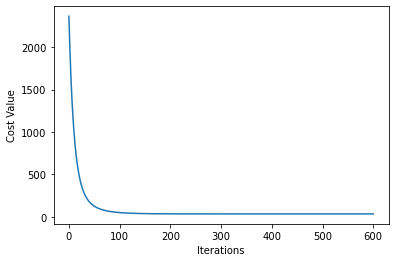

Train Result:

SSE for this ridge regression model is:  33.57314193837133
MSE for this ridge regression model is:  0.3425830810037891


Test Result:

SSE for this ridge regression model is:  8.974750111955007
MSE for this ridge regression model is:  0.0915790827750511


In [108]:
# for lambda = 2 and alpha = 0.001
theta_vector = np.random.randn(len(x_train[0]))
iteration_x_axis = []
cost_y_axis = []
theta_vector = ridge_regression_gradient_descent(theta_vector,x_train,2,0.0001,iteration_x_axis,cost_y_axis)
# plot showing how the cost function decreases and then becomes constant after certain number of iterations
plt.plot(iteration_x_axis,cost_y_axis)
plt.xlabel("Iterations")
plt.ylabel("Cost Value")
plt.show()

# function to print mse_sse_ridge
mse_sse_ridge(x_train,theta_vector,x_test)

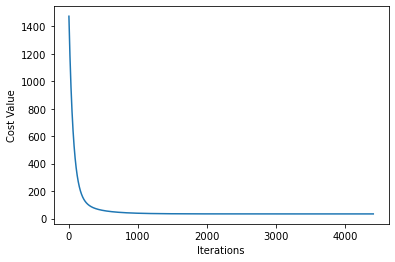

Train Result:

SSE for this ridge regression model is:  33.57326461501443
MSE for this ridge regression model is:  0.3425843328062697


Test Result:

SSE for this ridge regression model is:  8.97218938471919
MSE for this ridge regression model is:  0.09155295290529786


In [109]:
# for lambda = 1 and alpha = 0.00001
theta_vector = np.random.randn(len(x_train[0]))
iteration_x_axis = []
cost_y_axis = []
theta_vector = ridge_regression_gradient_descent(theta_vector,x_train,1,0.00001,iteration_x_axis,cost_y_axis)
# plot showing how the cost function decreases and then becomes constant after certain number of iterations
plt.plot(iteration_x_axis,cost_y_axis)
plt.xlabel("Iterations")
plt.ylabel("Cost Value")
plt.show()

# function to print mse_sse_ridge
mse_sse_ridge(x_train,theta_vector,x_test)

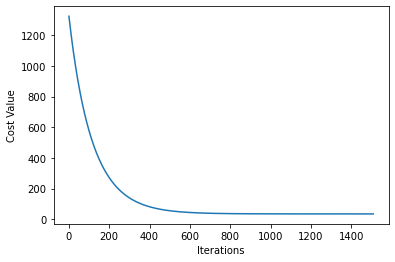

Train Result:

SSE for this ridge regression model is:  33.97833325443483
MSE for this ridge regression model is:  0.34671768626974314


Test Result:

SSE for this ridge regression model is:  8.985069354212943
MSE for this ridge regression model is:  0.09168438116543819


In [110]:
# for lambda = 100 and alpha = 0.00001
theta_vector = np.random.randn(len(x_train[0]))
iteration_x_axis = []
cost_y_axis = []
theta_vector = ridge_regression_gradient_descent(theta_vector,x_train,100,0.00001,iteration_x_axis,cost_y_axis)
# plot showing how the cost function decreases and then becomes constant after certain number of iterations
plt.plot(iteration_x_axis,cost_y_axis)
plt.xlabel("Iterations")
plt.ylabel("Cost Value")
plt.show()

# function to print mse_sse_ridge
mse_sse_ridge(x_train,theta_vector,x_test)

## `Test Run for Polynomial with degree 2`

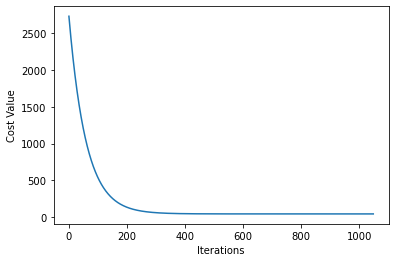

Train Result:

SSE for this ridge regression model is:  43.44678878317789
MSE for this ridge regression model is:  0.4433345794201825


Test Result:

SSE for this ridge regression model is:  33171.49462363578
MSE for this ridge regression model is:  338.48463901669163


In [111]:
# for lambda = 2 and alpha = 0.0000001
iteration_x_axis = []
cost_y_axis = []
x_data_train, theta_vector = generate_data_theta_vector_higher_degree(2,x_train)
x_data_test, temp = generate_data_theta_vector_higher_degree(2,x_test)
theta_vector = ridge_regression_gradient_descent(theta_vector,x_data_train,2,0.0000001,iteration_x_axis,cost_y_axis)
# plot showing how the cost function decreases and then becomes constant after certain number of iterations
plt.plot(iteration_x_axis,cost_y_axis)
plt.xlabel("Iterations")
plt.ylabel("Cost Value")
plt.show()

# function to print mse_sse_ridge
mse_sse_ridge(x_data_train,theta_vector,x_data_test)

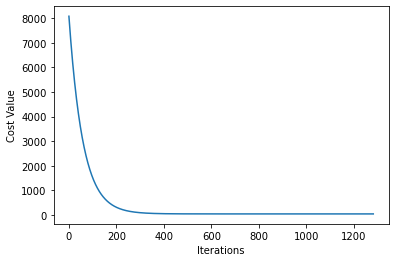

Train Result:

SSE for this ridge regression model is:  42.84707138048326
MSE for this ridge regression model is:  0.4372150140865638


Test Result:

SSE for this ridge regression model is:  106.70124797027755
MSE for this ridge regression model is:  1.0887882445946688


In [112]:
# for lambda = 10 and alpha = 0.0000001
iteration_x_axis = []
cost_y_axis = []
x_data_train, theta_vector = generate_data_theta_vector_higher_degree(2,x_train)
x_data_test, temp = generate_data_theta_vector_higher_degree(2,x_test)
theta_vector = ridge_regression_gradient_descent(theta_vector,x_data_train,10,0.0000001,iteration_x_axis,cost_y_axis)
# plot showing how the cost function decreases and then becomes constant after certain number of iterations
plt.plot(iteration_x_axis,cost_y_axis)
plt.xlabel("Iterations")
plt.ylabel("Cost Value")
plt.show()

# function to print mse_sse_ridge
mse_sse_ridge(x_data_train,theta_vector,x_data_test)

## `Test Run for Polynomial with degree 3`

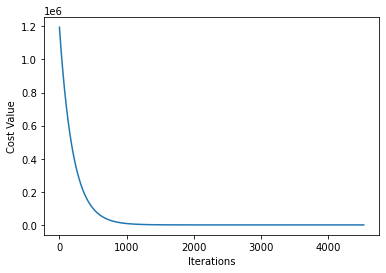

Train Result:

SSE for this ridge regression model is:  43.99616723663171
MSE for this ridge regression model is:  0.44894048200644604


Test Result:

SSE for this ridge regression model is:  889.7357459915467
MSE for this ridge regression model is:  9.07893618358721


In [113]:
# for lambda = 1 and alpha = 0.000000002
iteration_x_axis = []
cost_y_axis = []
x_data_train, theta_vector = generate_data_theta_vector_higher_degree(3,x_train)
x_data_test, temp = generate_data_theta_vector_higher_degree(3,x_test)
theta_vector = ridge_regression_gradient_descent(theta_vector,x_data_train,1,0.000000002,iteration_x_axis,cost_y_axis)
# plot showing how the cost function decreases and then becomes constant after certain number of iterations
plt.plot(iteration_x_axis,cost_y_axis)
plt.xlabel("Iterations")
plt.ylabel("Cost Value")
plt.show()


# function to print mse_sse_ridge
mse_sse_ridge(x_data_train,theta_vector,x_data_test)

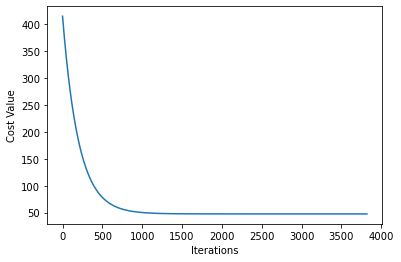

Train Result:

SSE for this ridge regression model is:  42.94669288322083
MSE for this ridge regression model is:  0.43823156003286556


Test Result:

SSE for this ridge regression model is:  7029.8904374037265
MSE for this ridge regression model is:  71.73357589187476


In [114]:
# for lambda = 50 and alpha = 0.000000002
iteration_x_axis = []
cost_y_axis = []
x_data_train, theta_vector = generate_data_theta_vector_higher_degree(3,x_train)
x_data_test, temp = generate_data_theta_vector_higher_degree(3,x_test)
theta_vector = ridge_regression_gradient_descent(theta_vector,x_data_train,50,0.000000002,iteration_x_axis,cost_y_axis)
# plot showing how the cost function decreases and then becomes constant after certain number of iterations
plt.plot(iteration_x_axis,cost_y_axis)
plt.xlabel("Iterations")
plt.ylabel("Cost Value")
plt.show()

# finding error for the test data
mse_sse_ridge(x_data_train,theta_vector,x_data_test)

## `Test Run for Polynomial with degree 4`

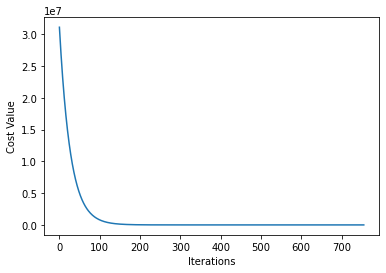

Train Result:

SSE for this ridge regression model is:  43.800655494879564
MSE for this ridge regression model is:  0.44694546423346493


Test Result:

SSE for this ridge regression model is:  144988.85140235638
MSE for this ridge regression model is:  1479.4780755342488


In [115]:
# for lambda = 2 and alpha = 0.000000001
iteration_x_axis = []
cost_y_axis = []
x_data_train, theta_vector = generate_data_theta_vector_higher_degree(4,x_train)
x_data_test, temp = generate_data_theta_vector_higher_degree(4,x_test)
theta_vector = ridge_regression_gradient_descent(theta_vector,x_data_train,2,0.000000001,iteration_x_axis,cost_y_axis)
# plot showing how the cost function decreases and then becomes constant after certain number of iterations
plt.plot(iteration_x_axis,cost_y_axis)
plt.xlabel("Iterations")
plt.ylabel("Cost Value")
plt.show()

# finding error for the test data
mse_sse_ridge(x_data_train,theta_vector,x_data_test)

# `Insights drawn (plots, markdown explanations)`



- In ```Lasso Regression``` we use ```L1``` norm for the penalty term, whereas in ```Ridge Regression``` we use ```L2``` norm for the penalty term.



- We can see that in both Lasso and Ridge regression ```lower degree polynomials``` are giving lower MSE values for both training as well as testing data, but as we increase the degree of polynomials, we can see that there is significant difference between MSE for train and test data,MSE values for test data is much higher than MSE for training data which shows they are ```overfitting the training data```.


#  `Comparison of Logistic Regression and Least Squares Classification`

## `Logistic Regression`

- Logistic Regression is a statistical and machine learning technique for binary classification, i.e., it helps predict one of the two values 0 and 1 based on input features.

- In Logistic Regression, the prabability of an outcome is calculated using the sigmoid function.

### Sigmoid function
$$
\begin{equation}
P(Y = 1 | X) = \sigma(a) = \frac{1}{1 + e^{-a}}
\end{equation}
$$

### Cost Function in Logistic Regression

$$
\begin{equation}
L(y, y_{predicted}) = - [y * log(y_{predicted}) + (1 - y) * log(1 - y_{predicted})]
\end{equation}
$$


*   y: actual value


*   $y_{predicted}$: predicted value


*   Advantage of Logistic Regression is that it is less prone to overfitting, and is easy to read and interpret.


*   Disadvantage of Logistic Regression is that it assumes linearity property between the dependent variable and the independent variables, which narrows down the scope of usage of this technique.

#### Gradient with respect to weights $dw$:

The gradient of the cost function $J(w)$ with respect to the weights $w_j$ in the context of linear regression is given by:

$$
\begin{equation}
\frac{\partial J(w)}{\partial w_j} = \frac{1}{n} \sum_{i=1}^{n} (h_{w}(x^{(i)}) - y^{(i)}) \cdot x_j^{(i)}
\end{equation}
$$


In vectorized form, this becomes:

$$
\begin{equation}
dw = \frac{1}{n} X^T \cdot (h_{w}(X) - y)
\end{equation}
$$

where:
- $X$ is the matrix of input features where each row is a sample and each column is a feature.


- $y$ is the vector of actual target values.


- $h_{w}(X)$ is the vector of predicted values using the current weights \(w\).

#### Gradient with respect to bias $db$

The gradient of the cost function $J(w)$ with respect to the bias $b$ is given by:

$$
\begin{equation}
\frac{\partial J(w)}{\partial b} = \frac{1}{n} \sum_{i=1}^{n} (h_{w}(x^{(i)}) - y^{(i)})
\end{equation}
$$

In a more compact form:
$$
\begin{equation}
db = \frac{1}{n} \sum (h_{w}(X) - y)
\end{equation}
$$


These gradients $dw$ and $db$ are then used in gradient descent to update the weights and bias, aiding the model in learning and improving its predictions during the training process.

In [116]:
X_train, X_test = train_set.drop(columns='Outcome'), test_set.drop(columns='Outcome')
y_train, y_test = train_set['Outcome'].to_numpy(), test_set['Outcome'].to_numpy()

In [117]:
class LogisticRegression:
    def __init__(self,lr=0.01,n_iters=1000):
        self.lr=lr
        self.n_iters=n_iters
        self.weights = None
        self.bias = None
        self.costs=[]

    def compute_loss(self, y, y_predicted):
        #Computing the log of loss function
        cost = - (y * np.log(y_predicted) + (1 - y) * np.log(1 - y_predicted)).mean()
        return cost
        
    def fit(self,X,y):
        n_samples, n_features = X.shape
        self.weights=np.zeros(n_features)
        self.bias=0

        for _ in range(self.n_iters):
            linearmodel= np.dot(X,self.weights) + self.bias
            y_predicted = self.sigmoid(linearmodel)

            loss = self.compute_loss(y, y_predicted)
            self.costs.append(loss)
            #Calculate the derivative of loss function with respect to w and b and subtract them respectively
            dw= (1/n_samples) * np.dot(X.T, (y_predicted-y))
            db= (1/n_samples) * np.sum(y_predicted-y)
            self.weights -= self.lr *dw
            self.bias -= self.lr * db
          
    def predict(self,X):
            linearmodel = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linearmodel)
            y_predicted_cls = np.where(y_predicted > 0.5, 1, 0)  # Thresholding at 0.5
            return y_predicted_cls


    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

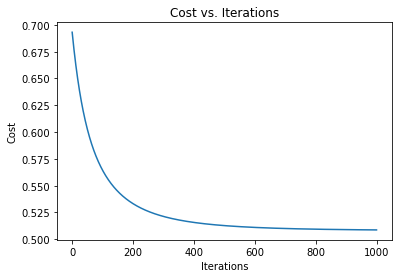

Model : Logistic Regression
Train Result:

CLASSIFICATION REPORT:
Class      Precision       Recall          F1-Score       
Class 0    0.79            0.89            0.8389380530973453
Class 1    0.69            0.51            0.5844748858447488
_______________________________________________

Accuracy Score: 76.79%
_______________________________________________

Confusion Matrix:
[[237  29]
 [ 62  64]]



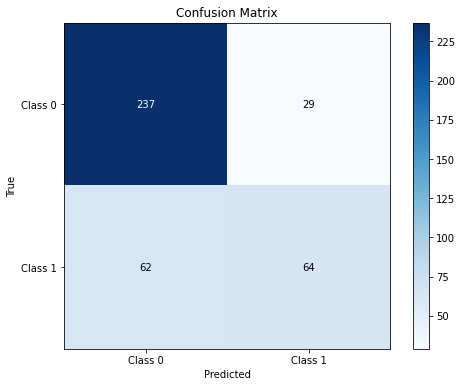

Model : Logistic Regression
Test Result:

CLASSIFICATION REPORT:
Class      Precision       Recall          F1-Score       
Class 0    0.79            0.86            0.8208955223880597
Class 1    0.68            0.56            0.6129032258064516
_______________________________________________

Accuracy Score: 75.51%
_______________________________________________

Confusion Matrix:
[[55  9]
 [15 19]]



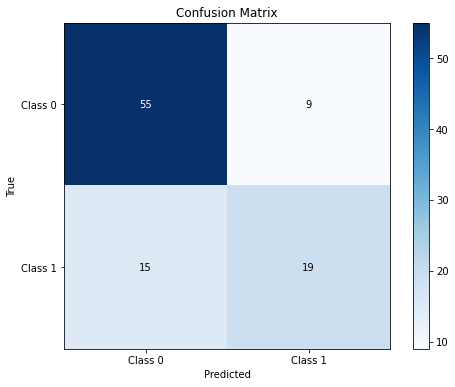

In [118]:
# Train the logistic regression model
regressor = LogisticRegression(lr=0.03, n_iters=1000)
regressor.fit(X_train, y_train)

# predictions
test_predictions = regressor.predict(X_test)
train_predictions = regressor.predict(X_train)

# graph for cost function
plt.plot(range(regressor.n_iters), regressor.costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Iterations')
plt.show()


print_score("Logistic Regression",train_predictions,y_train,test_predictions,y_test,True)
print_score("Logistic Regression",train_predictions,y_train,test_predictions,y_test,False)

# `Least Square Classification`

*   Least Squares Classification is a very important technique used to solve binary classification problems. It directly assigns values 0 or 1 based on linear combination of input features.

The W matrix mentioned above can be written in the below form
$$
W = \begin{bmatrix}
    w_1^{0} ... w_k^{0} \\
    w_1^{1} ... w_k^{1}\\
    w_1^{1} ... w_k^{2}\\
    \vdots \\
    w_1^{D} ... w_k^{D}
\end{bmatrix}
$$

*   We now determine the parameter matrix W by minimizing a sum-of-squares error function
*   Consider a training set {$x_n$, $t_n$} n=1,2,....,N

*   We define a matrix T whose nth row denotes $t_n^T$ vector together with a matrix X whose nth row denotes $x_n^T$

$$
T = \begin{bmatrix}
    t_1^{0} ... t_1^{0} \\
    t_2^{1} ... t_2^{1}\\
    t_3^{1} ... t_3^{2}\\
    \vdots \\
    t_N^{D} ... t_N^{D}
\end{bmatrix}
$$

The X matrix can be written as
$$
X = \begin{bmatrix}
    x_1^{0} ... x_1^{D} \\
    x_2^{1} ... x_2^{D}\\
    x_3^{1} ... x_3^{D}\\
    \vdots \\
    x_N^{D} ... x_N^{D}
\end{bmatrix}
$$

The sum of squares error function:
$$
\begin{equation}
E_D(W) = (1/2) Tr[(XW - T)^{T}(XW-T)]
\end{equation}
$$

*   Setting the derivative of the above function with respect to W as 0 and rearranging terms, we get

$$
\begin{equation}
W = (X^{T}X)^{-1}X^{T}T = X^{+}
\end{equation}
$$


*   T : NxK target matrix whose nth row is $t_n$
*   X : Nx(D+1) input matrix whose nth row is $x_n^T$

*   Advantage of Least Square Classification is that it is easy to understand and the decision boundary can be interpreted easily in terms of coefficients of the features


*   Disadvantages of Least Square Classification are that this method is easily influenced by outliers and thus may not give most accurate results. It does not give probabilistic outputs like ridge regression. It does not work for non-linear decision boundaries case as well

In [119]:
class LeastSquaresClassifier:
    def __init__(self):
        self.coefficients = None
        self.sse= None
    def fit(self, X, y):
        # Add a column of ones as bias
        X = np.column_stack((np.ones(X.shape[0]), X))

        # Calculating weights
        self.coefficients = np.linalg.inv(X.T @ X) @ X.T @ y
        residuals = X @ self.coefficients - y
        self.sse = np.sum(residuals.T @ residuals)
        
    def predict(self, X):
        # Add a column of ones for bias
        X = np.column_stack((np.ones(X.shape[0]), X))       
        # Predict using the learned weights
        return np.dot(X, self.coefficients)

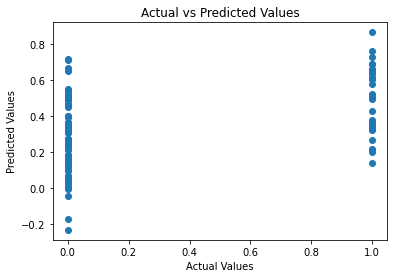

Model : Least Square Classification
Train Result:

CLASSIFICATION REPORT:
Class      Precision       Recall          F1-Score       
Class 0    0.79            0.89            0.8380281690140845
Class 1    0.69            0.49            0.5740740740740741
_______________________________________________

Accuracy Score: 76.53%
_______________________________________________

Confusion Matrix:
[[238  28]
 [ 64  62]]



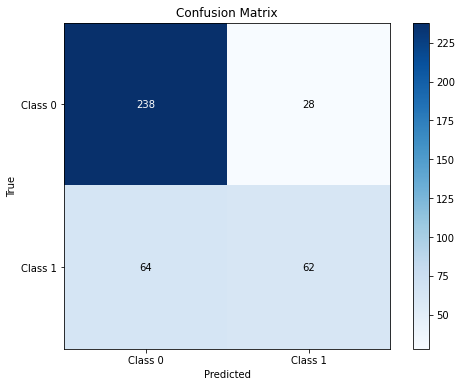

Model : Least Square Classification
Test Result:

CLASSIFICATION REPORT:
Class      Precision       Recall          F1-Score       
Class 0    0.77            0.84            0.8059701492537314
Class 1    0.64            0.53            0.5806451612903226
_______________________________________________

Accuracy Score: 73.47%
_______________________________________________

Confusion Matrix:
[[54 10]
 [16 18]]



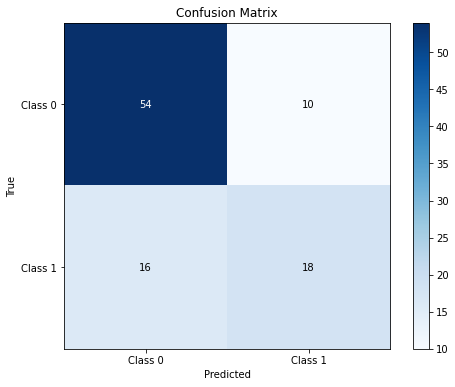

In [120]:
classifier = LeastSquaresClassifier()
classifier.fit(X_train, y_train)

# test data
y_test_predicted = classifier.predict(X_test)
y_test_predicted_binary = np.round(y_test_predicted)

# train data
y_train_predicted = classifier.predict(X_train)
y_train_predicted_binary = np.round(y_train_predicted)


plt.scatter(y_test, y_test_predicted)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


print_score("Least Square Classification",y_train_predicted_binary,y_train,y_test_predicted_binary,y_test,True)
print_score("Least Square Classification",y_train_predicted_binary,y_train,y_test_predicted_binary,y_test,False)

# `Insights drawn (plots, markdown explanations)`

- In ```Least Square Classification```, we aim to ```minimize the SSE```, wherease in Logisitic Regression we aim to model the probability of the binary outcome.


- In Logistic Regression we model the probability of the binary outcome by using a ```logisitic sigmoid function```.


- As we can see that Logistic Regression is giving ```more accuracy``` for the test data, as compared to the Least Square Classification.



# `References`

- https://numpy.org/doc/stable/reference/generated/numpy.dot.html
- https://pandas.pydata.org/
- https://matplotlib.org/
- https://www.geeksforgeeks.org/machine-learning/
- https://seaborn.pydata.org/